# Blinking Experiment - Results

You can use this notebook to analyze the data we collected during the workshop.

In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter

## Load the data and add a 'censored' column

In [5]:
blinking_data = pd.read_csv('../data/Blinking experiment - results.csv')

In [6]:
blinking_data = blinking_data.assign(
    censored=lambda df: df['Number of seconds without blinking'] >= 30)

blinking_data.head()

,Name / pseudonym,Number of seconds without blinking,Wearing glasses / contacts / None,censored
0,2,4,Contacts,False
1,3,5,Glasses,False
2,4,8,NaN,False
3,5,10,NaN,False
4,6,12,NaN,False


## Survival curve using the Kaplan-Meier fitter

In [7]:
kmf = KaplanMeierFitter()

### Overall survival curve for all people

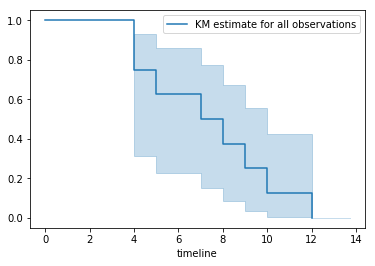

In [15]:
kmf.fit(blinking_data['Number of seconds without blinking'],
        ~blinking_data['censored'],  # note that observed is the opposite of censored, so we need to add the tilde (~)
        label='KM estimate for all observations')
kmf.plot();

### Survival curve separated by eyewear

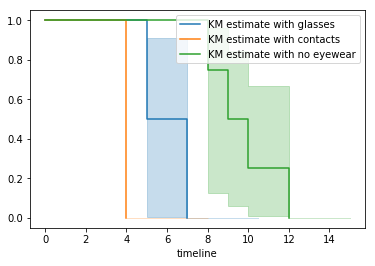

In [17]:
glasses = blinking_data['Wearing glasses / contacts / None'] == 'Glasses'
contacts = blinking_data['Wearing glasses / contacts / None'] == 'Contacts'
no_eyewear = blinking_data['Wearing glasses / contacts / None'].isnull()

kmf.fit(blinking_data.loc[glasses, 'Number of seconds without blinking'],
        ~blinking_data.loc[glasses, 'censored'],  # note that observed is the opposite of censored, so we need to add the tilde (~)
        label='KM estimate with glasses')
ax1 = kmf.plot()

kmf.fit(blinking_data.loc[contacts, 'Number of seconds without blinking'],
        ~blinking_data.loc[contacts, 'censored'],  # note that observed is the opposite of censored, so we need to add the tilde (~)
        label='KM estimate with contacts')
ax2 = kmf.plot(ax=ax1)

kmf.fit(blinking_data.loc[no_eyewear, 'Number of seconds without blinking'],
        ~blinking_data.loc[no_eyewear, 'censored'],  # note that observed is the opposite of censored, so we need to add the tilde (~)
        label='KM estimate with no eyewear')
kmf.plot(ax=ax2);